In [1]:
import os
import itertools
from keras.callbacks import EarlyStopping
from keras import backend as K
from keras.models import load_model
from sklearn.metrics import f1_score
import tools_stable as tools
import plot_confusion_matrix_Copy1 as plot_confusion_matrix
from sklearn.metrics import confusion_matrix
import pylab as plt

training_data, training_label, validation_data, validation_label, validation_cate_label = tools.get_data()

ks = 5
num_layer = 10
bs = 30
lr = 0.0001

def show(rec, gt, pred):
    plt.figure(figsize=(16,5))
    plt.xlim((0,5000))
    plt.plot(rec)
    print("GT:{}".format(gt))
    print("Pred: {}".format(pred))
    plt.show()

def run(bs, lr, ks, num_layer):
    fold=1
    for index, (X_train, Y_train, X_val, Y_val, val_cat) in enumerate(zip(training_data,
                                                       training_label,
                                                       validation_data,
                                                       validation_label,
                                                       validation_cate_label)):
        if index != 0: continue
        model = tools.create_model(lr, bs, ks, num_layer)
        print("Fold "+str(fold))
        early_stop = EarlyStopping(patience=20)
        model = load_model('K-1_model.h5')
        evaluation = model.evaluate(x = X_val, y = Y_val)
        validation_prediction = model.predict_classes(X_val, batch_size=bs)
        score = f1_score(val_cat, validation_prediction, average=None)
        
        fold = fold + 1
        
        test_prediction = model.predict_classes(X_val, batch_size=1)
        cnf_matrix = confusion_matrix(val_cat, test_prediction)
        plot_confusion_matrix.plot_confusion_matrix(cnf_matrix, classes=['AF','Noise','Normal','Other'], save_png=True)
        
        return X_val, val_cat, validation_prediction
    
f1_X_val, f1_val_cat, f1_validation_prediction = run(bs, lr, ks, num_layer)

Using TensorFlow backend.


Train Data: (10151, 9000, 1)
Train Label:  (10151, 4)
KFold(n_splits=5, random_state=100, shuffle=True)
trian: [    0     1     2 ... 10148 10149 10150] len 8120 test: [   12    21    22 ... 10136 10137 10138] len 2031
trian: [    2     4     5 ... 10148 10149 10150] len 8121 test: [    0     1     3 ... 10143 10144 10147] len 2030
trian: [    0     1     2 ... 10148 10149 10150] len 8121 test: [    4     5     8 ... 10130 10133 10146] len 2030
trian: [    0     1     2 ... 10146 10147 10149] len 8121 test: [   17    23    26 ... 10135 10148 10150] len 2030
trian: [    0     1     3 ... 10147 10148 10150] len 8121 test: [    2     6     7 ... 10142 10145 10149] len 2030
Fold 1
2031/2031 [==============================] - 2s 1ms/step


In [2]:
AF_O = []
for t in range(len(f1_val_cat)):
    if f1_val_cat[t] == 0 and f1_validation_prediction[t] == 3:
        AF_O.append(t)
#         print("gt: {}".format(f1_val_cat[t]))
#         print("pred: {}".format(f1_validation_prediction[t]))

A_A = []
for t in range(len(f1_val_cat)):
    if f1_val_cat[t] == 0 and f1_validation_prediction[t] == 0:
        A_A.append(t)
#         print("gt: {}".format(f1_val_cat[t]))
#         print("pred: {}".format(f1_validation_prediction[t]))

O_N = []
for t in range(len(f1_val_cat)):
    if f1_val_cat[t] == 3 and f1_validation_prediction[t] == 2:
        O_N.append(t)
        
N_O = []
for t in range(len(f1_val_cat)):
    if f1_val_cat[t] == 2 and f1_validation_prediction[t] == 3:
        N_O.append(t)

GT:2
Pred: 3


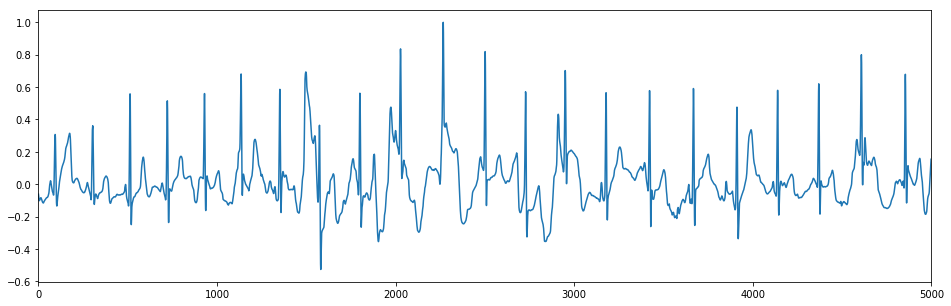

GT:2
Pred: 3


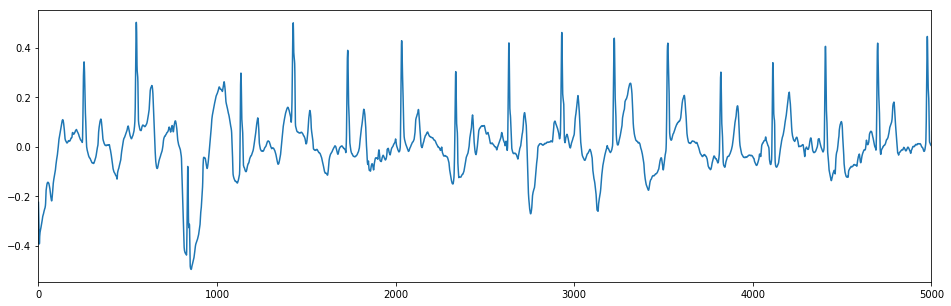

GT:2
Pred: 3


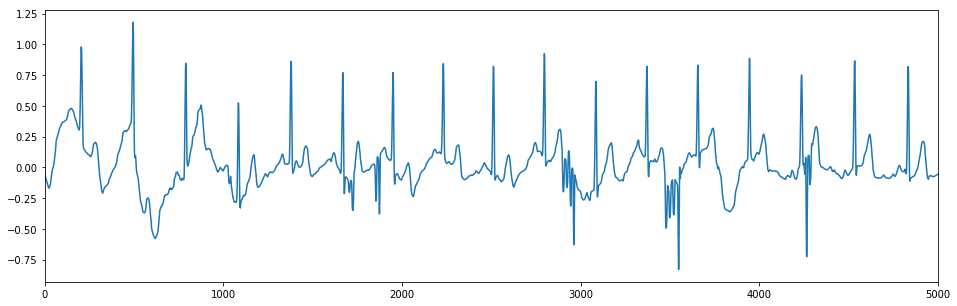

GT:2
Pred: 3


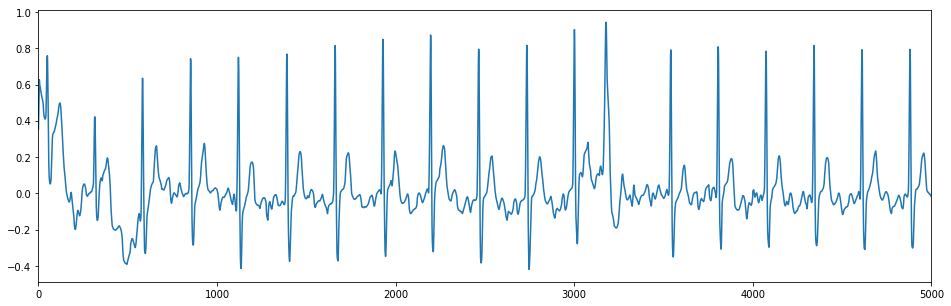

GT:2
Pred: 3


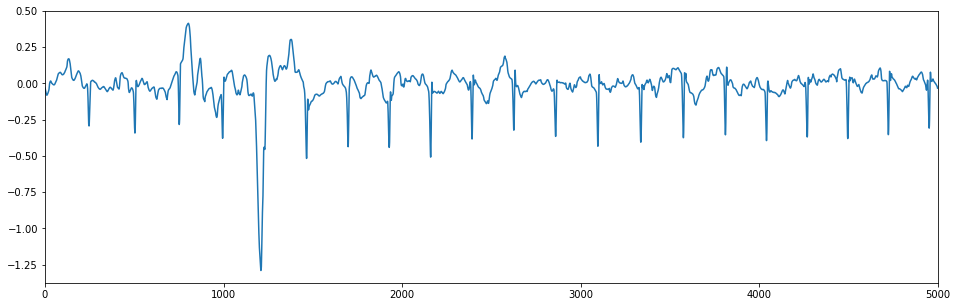

GT:2
Pred: 3


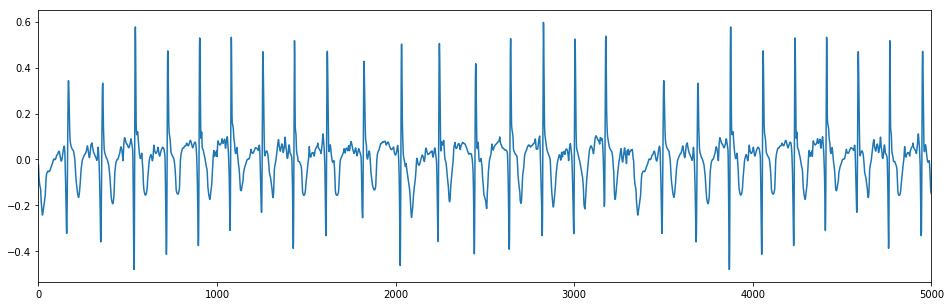

GT:2
Pred: 3


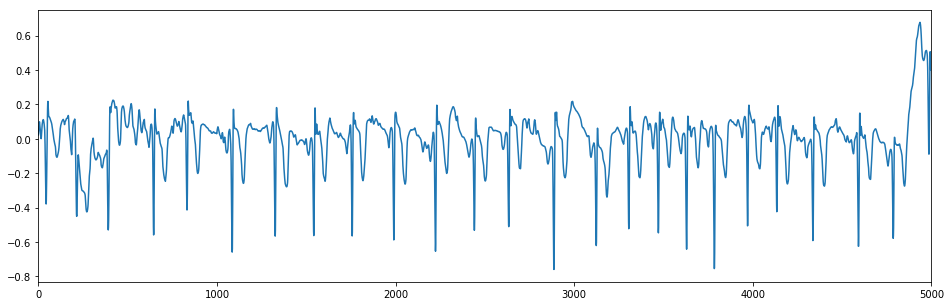

GT:2
Pred: 3


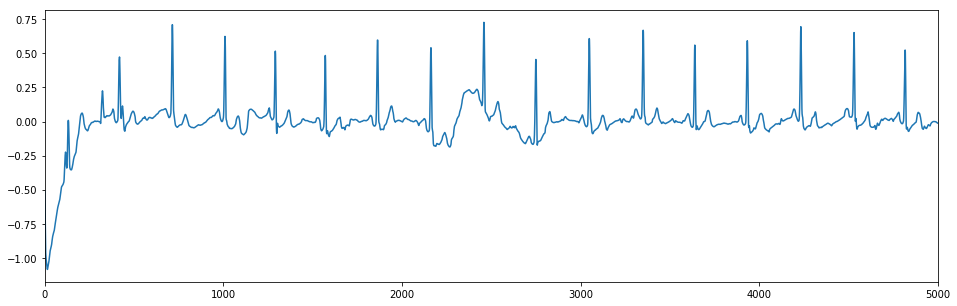

GT:2
Pred: 3


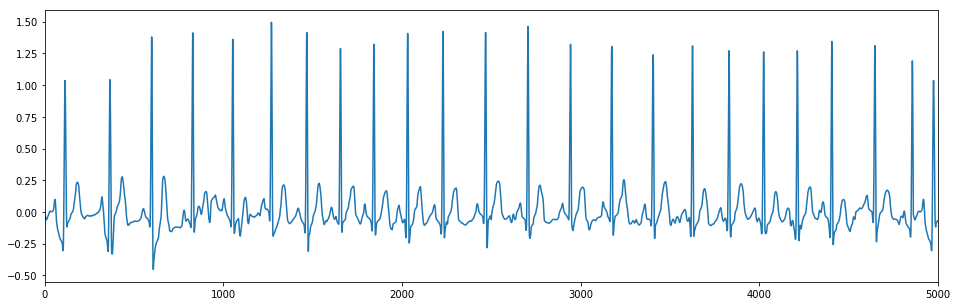

GT:2
Pred: 3


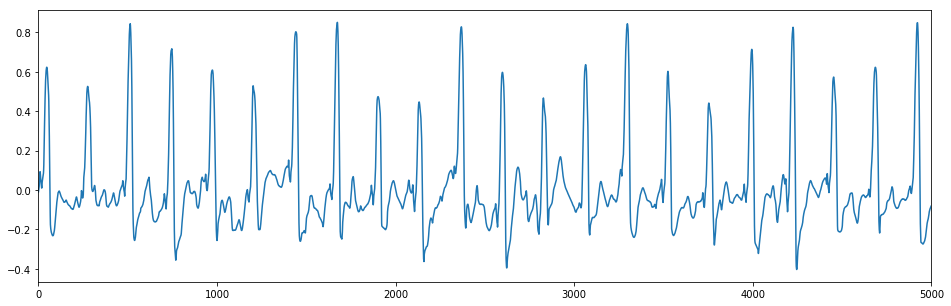

GT:2
Pred: 3


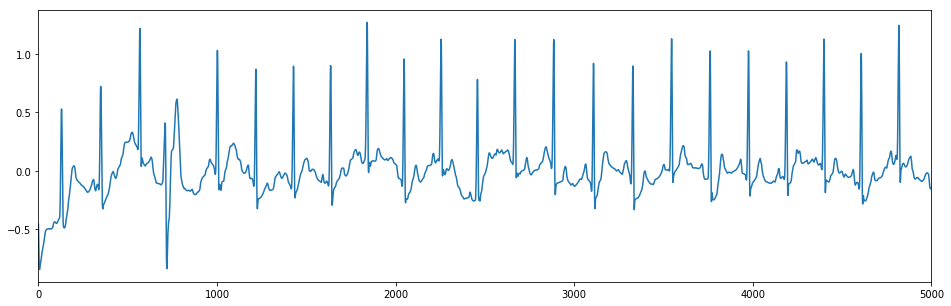

GT:2
Pred: 3


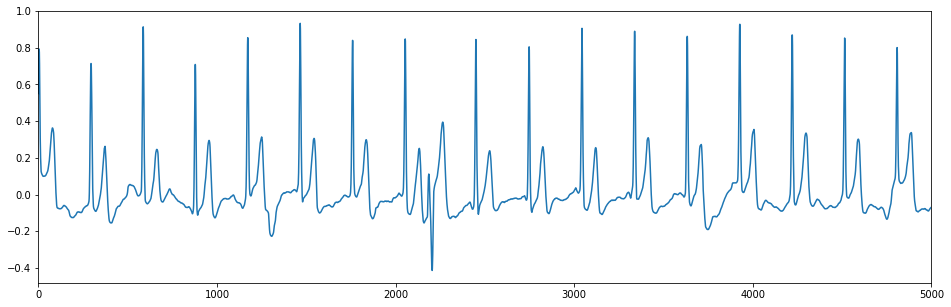

GT:2
Pred: 3


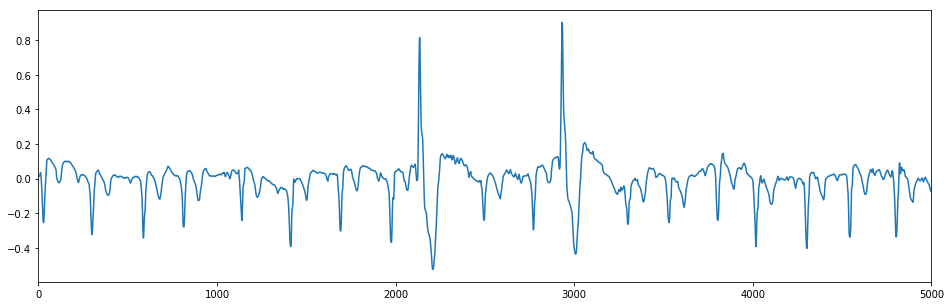

GT:2
Pred: 3


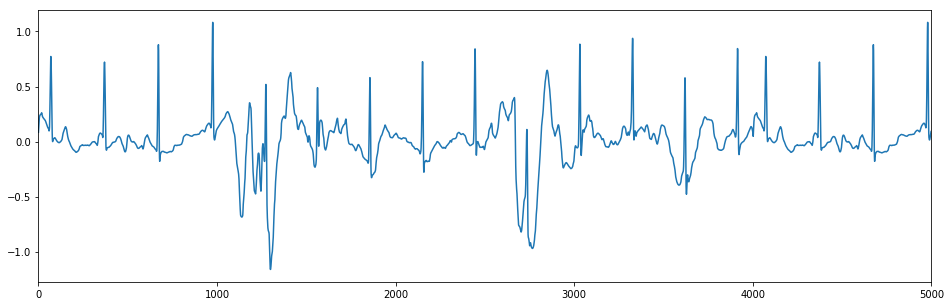

GT:2
Pred: 3


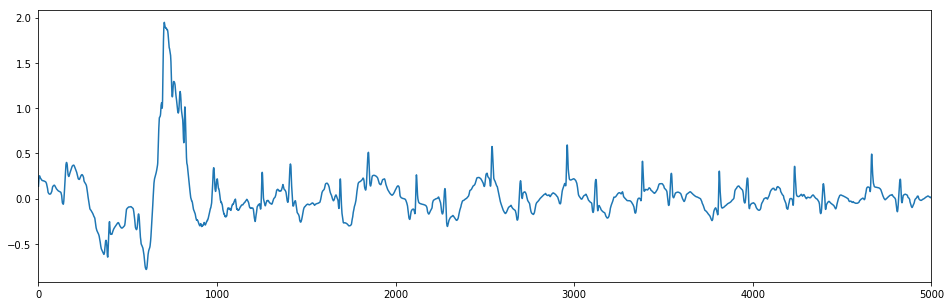

GT:2
Pred: 3


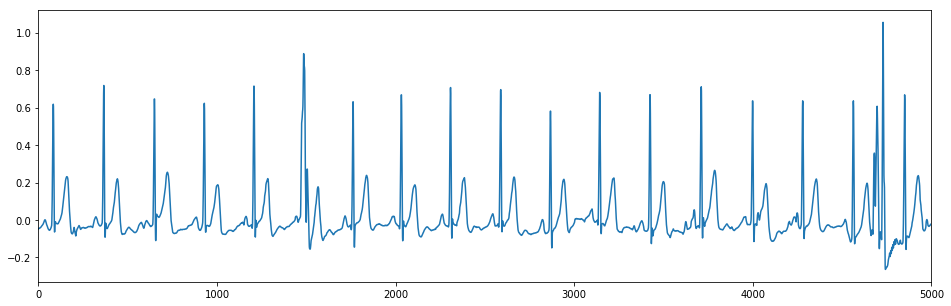

GT:2
Pred: 3


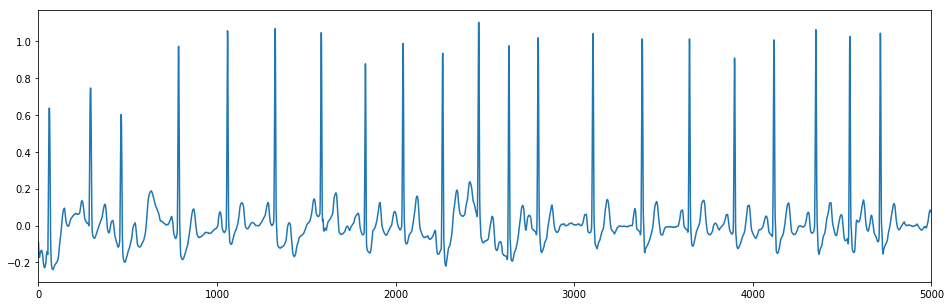

GT:2
Pred: 3


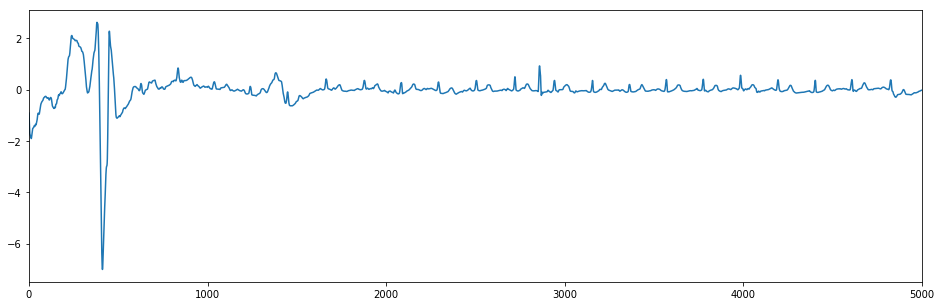

GT:2
Pred: 3


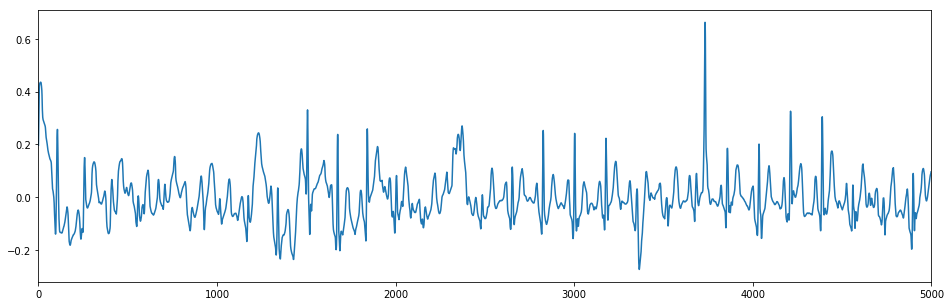

GT:2
Pred: 3


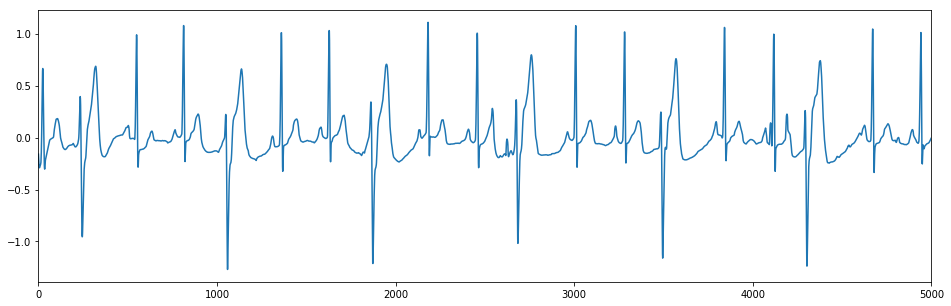

GT:2
Pred: 3


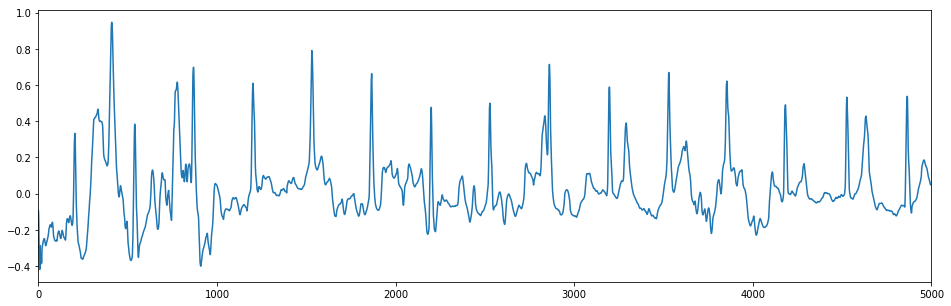

GT:2
Pred: 3


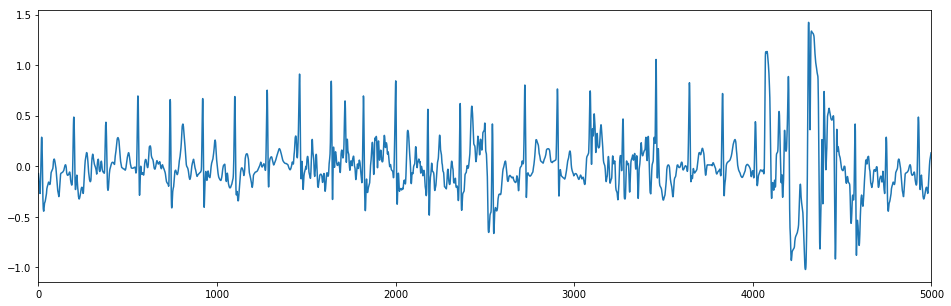

GT:2
Pred: 3


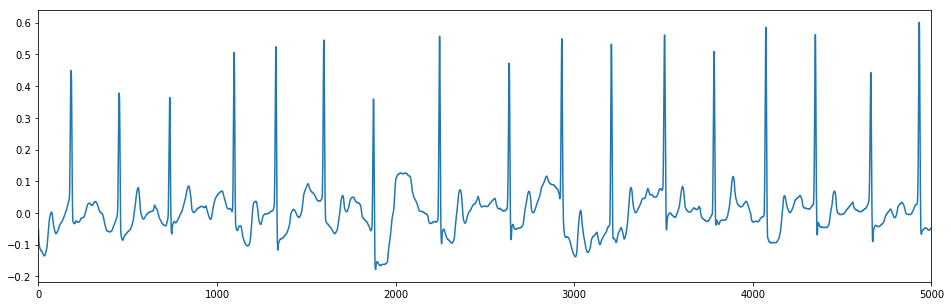

GT:2
Pred: 3


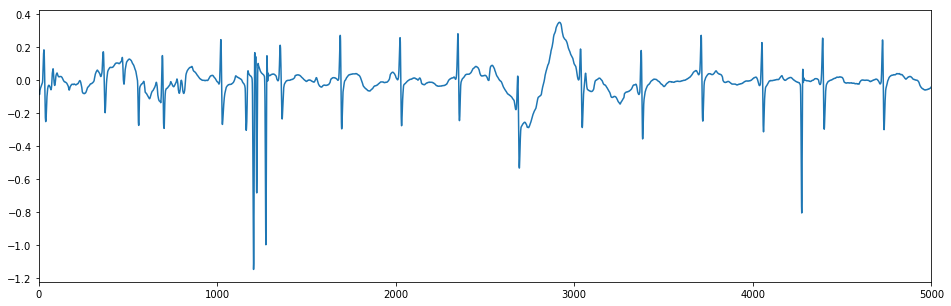

GT:2
Pred: 3


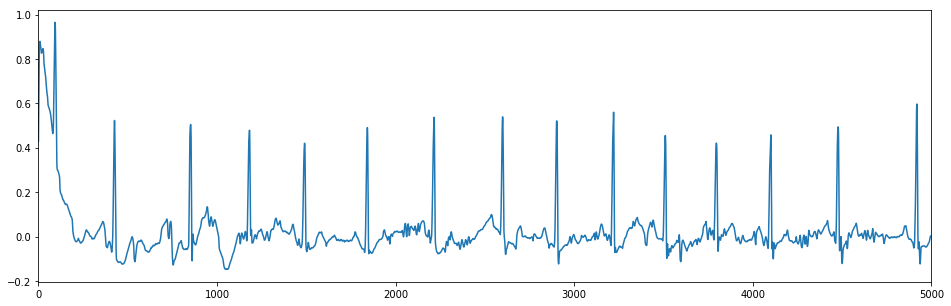

GT:2
Pred: 3


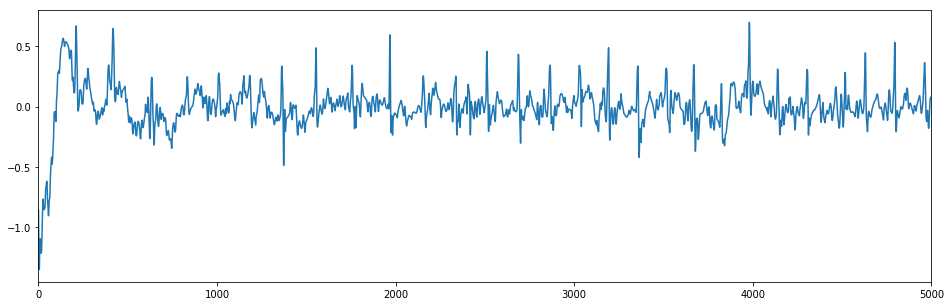

GT:2
Pred: 3


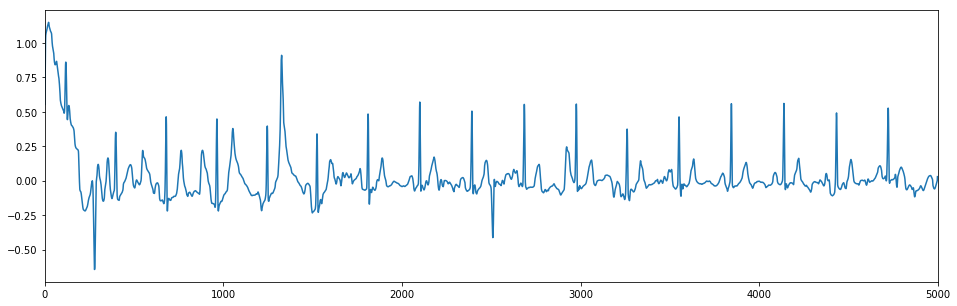

GT:2
Pred: 3


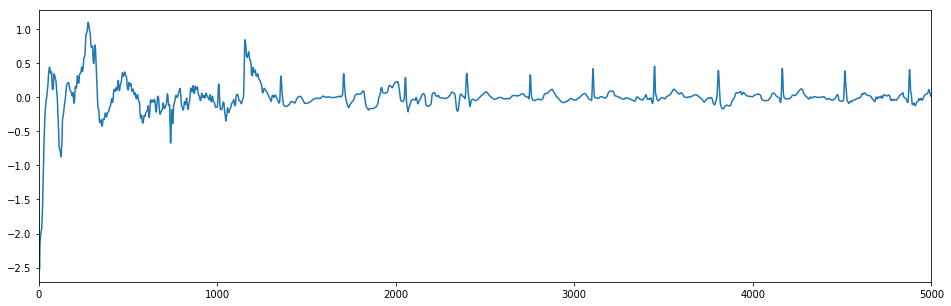

GT:2
Pred: 3


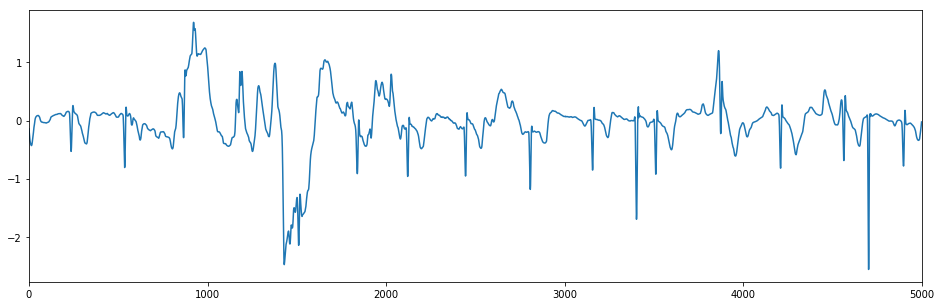

GT:2
Pred: 3


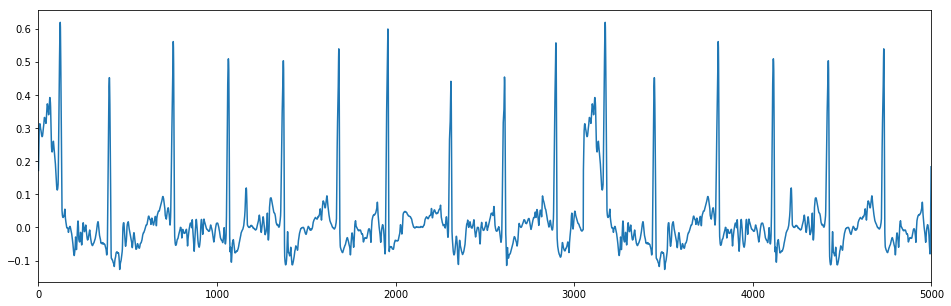

GT:2
Pred: 3


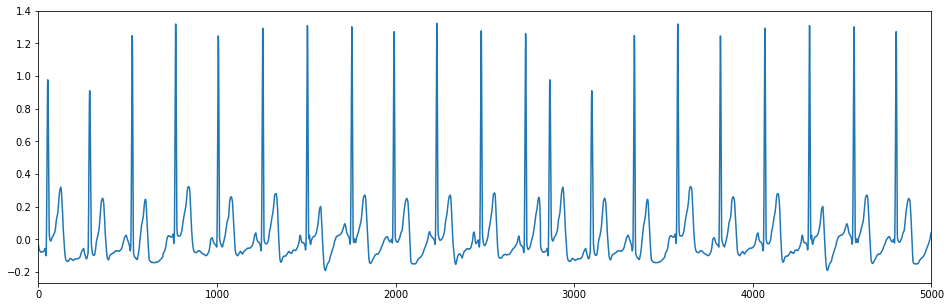

GT:2
Pred: 3


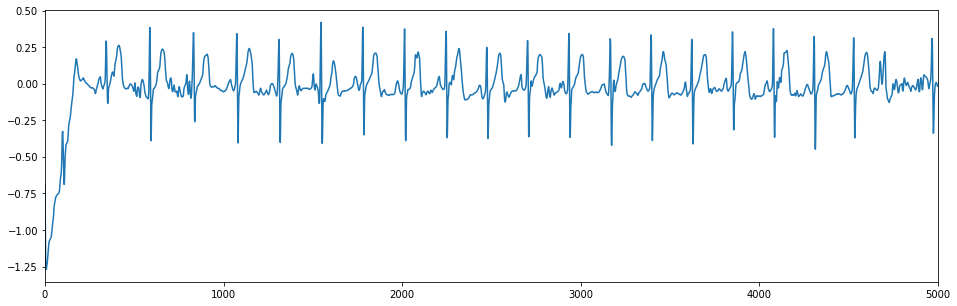

GT:2
Pred: 3


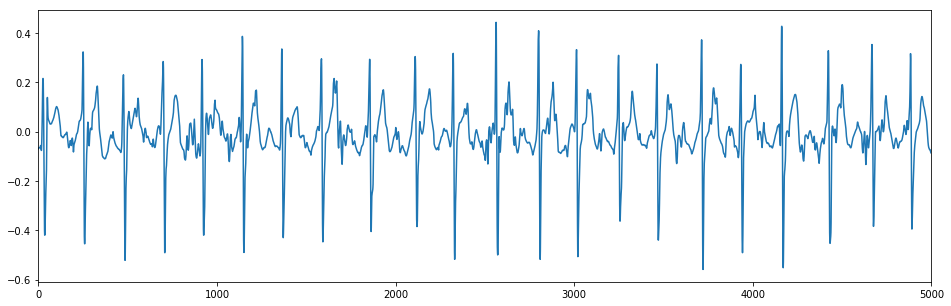

GT:2
Pred: 3


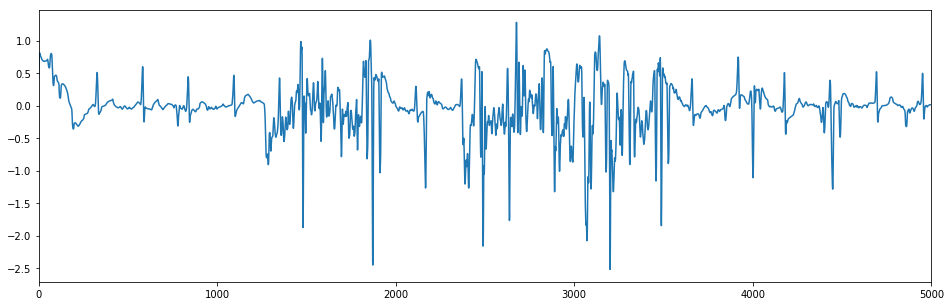

GT:2
Pred: 3


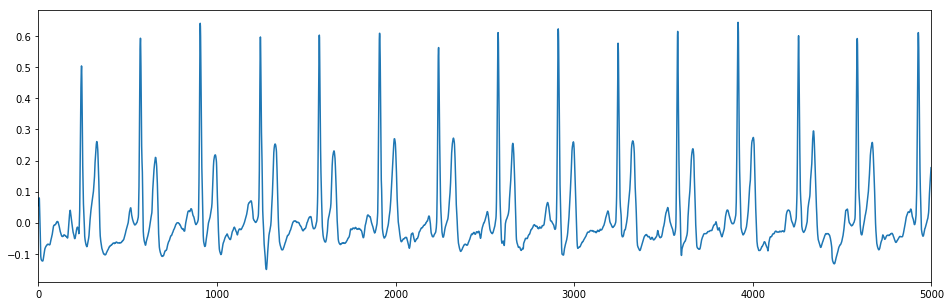

GT:2
Pred: 3


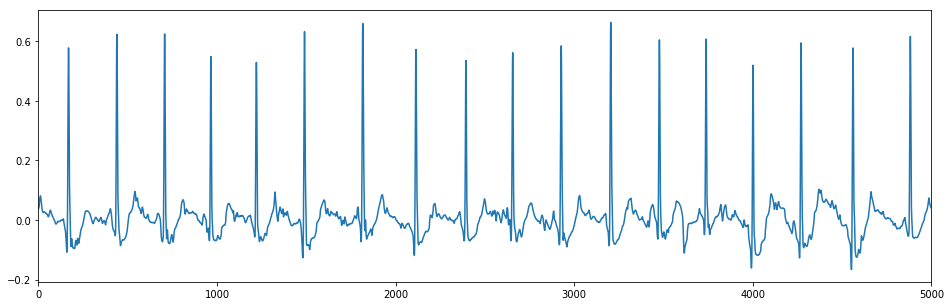

GT:2
Pred: 3


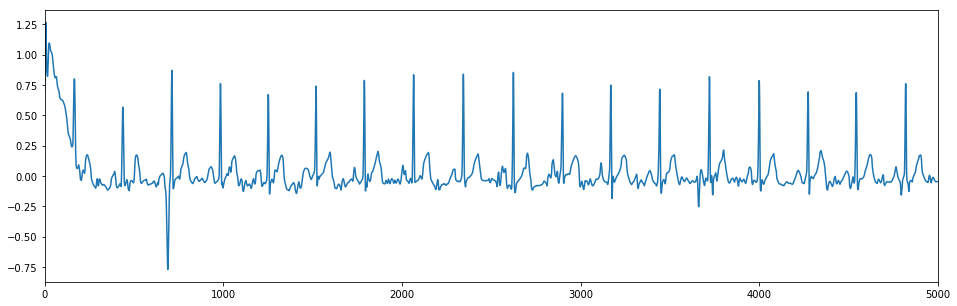

GT:2
Pred: 3


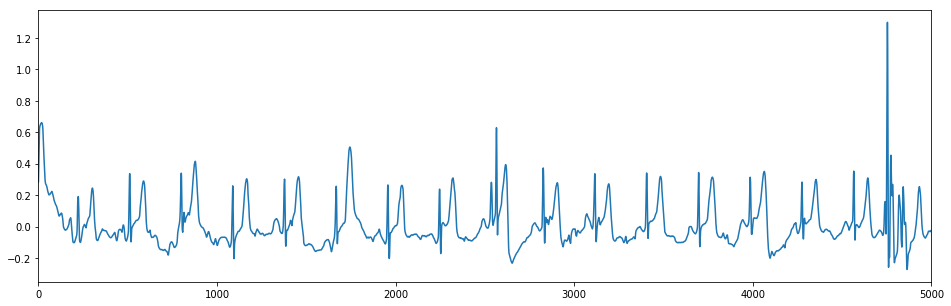

GT:2
Pred: 3


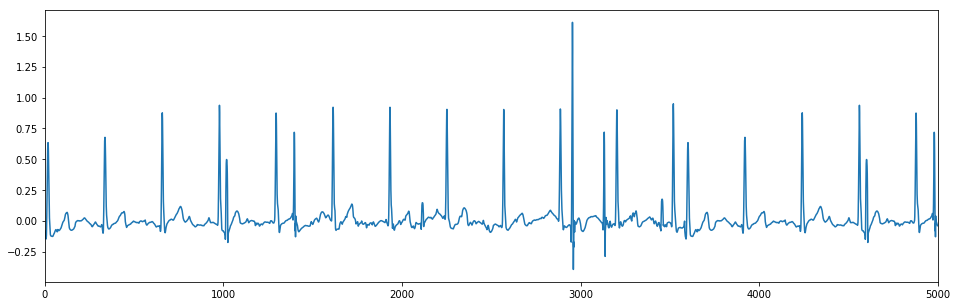

GT:2
Pred: 3


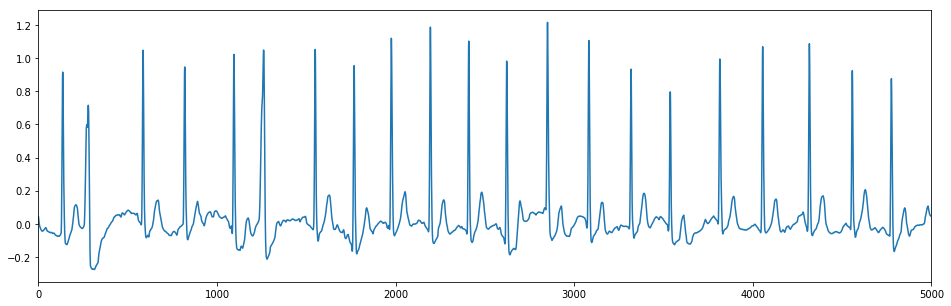

GT:2
Pred: 3


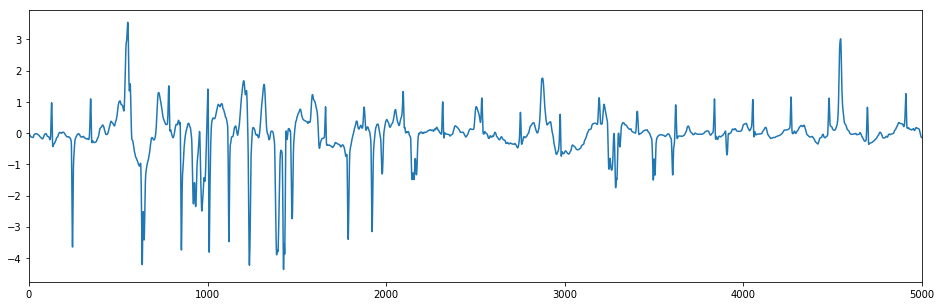

GT:2
Pred: 3


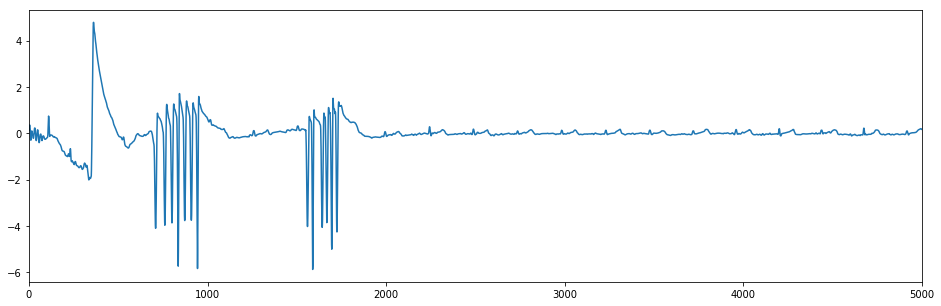

GT:2
Pred: 3


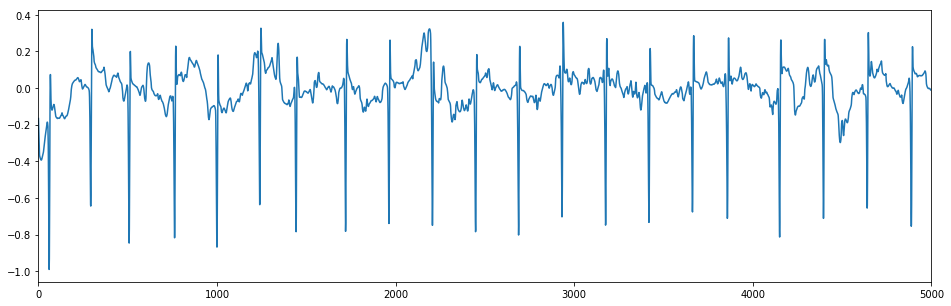

GT:2
Pred: 3


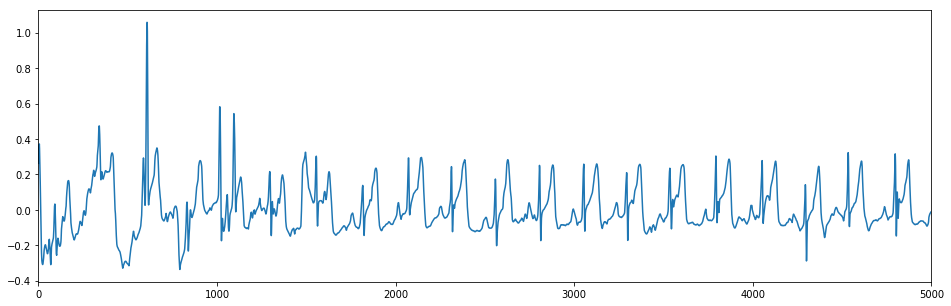

GT:2
Pred: 3


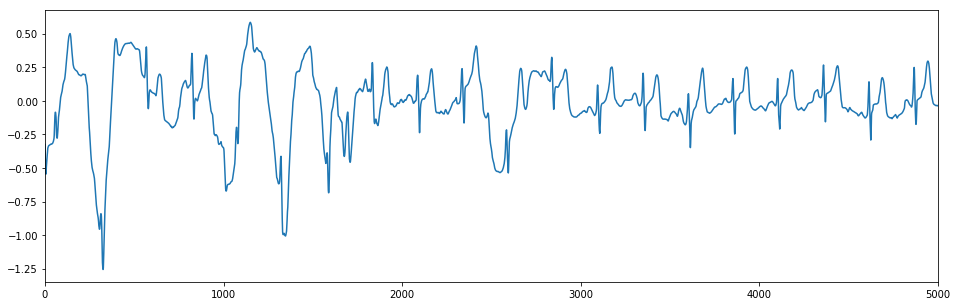

GT:2
Pred: 3


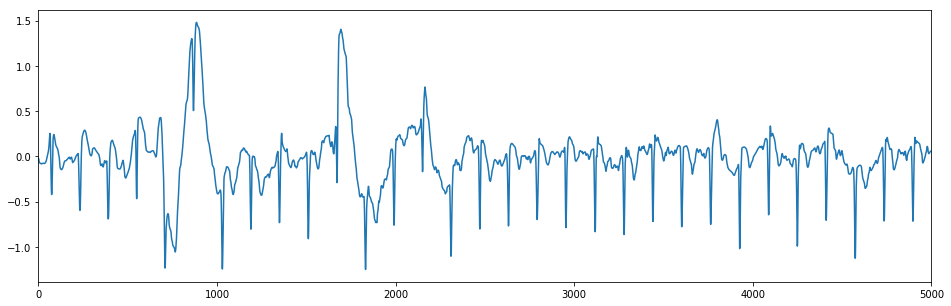

GT:2
Pred: 3


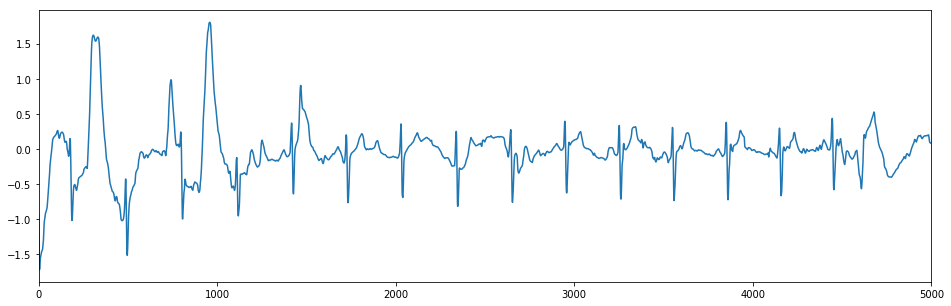

GT:2
Pred: 3


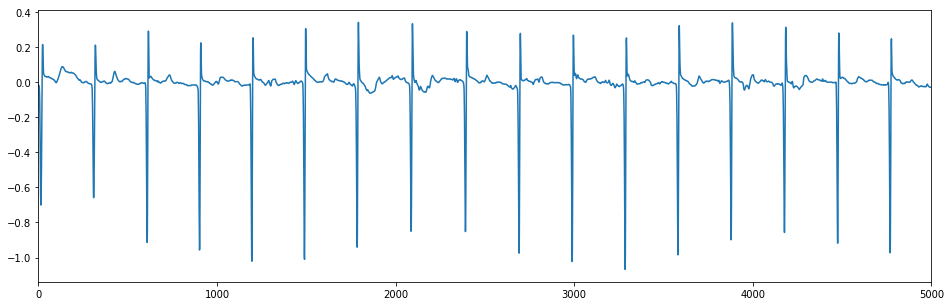

GT:2
Pred: 3


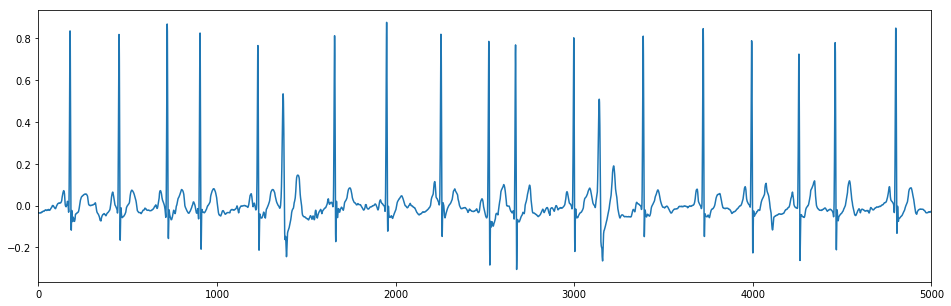

GT:2
Pred: 3


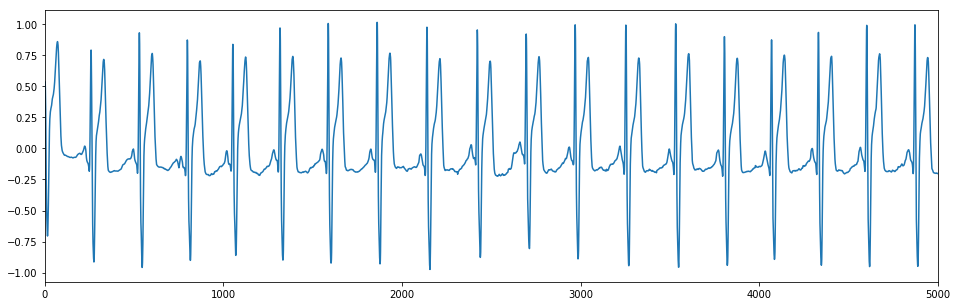

GT:2
Pred: 3


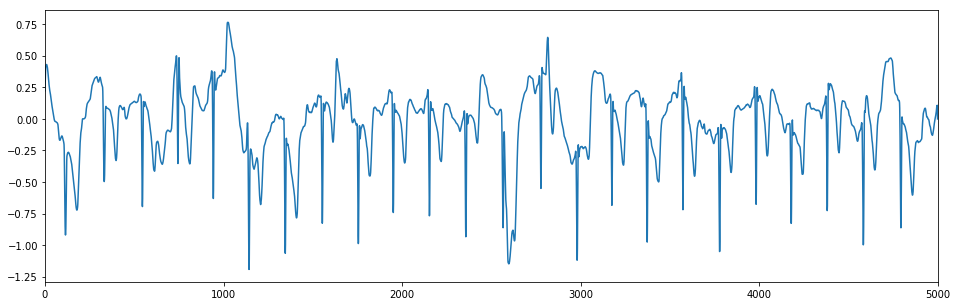

GT:2
Pred: 3


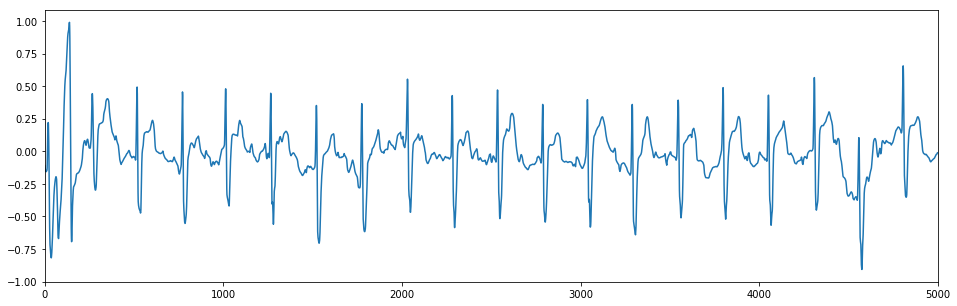

GT:2
Pred: 3


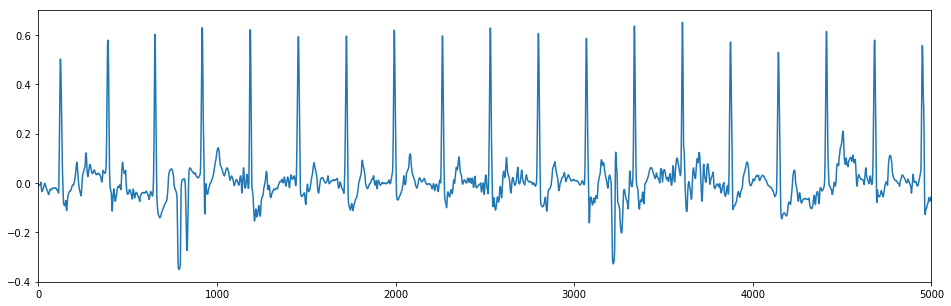

GT:2
Pred: 3


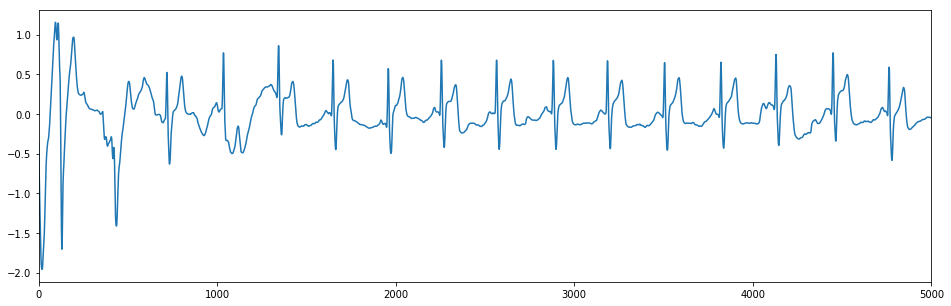

GT:2
Pred: 3


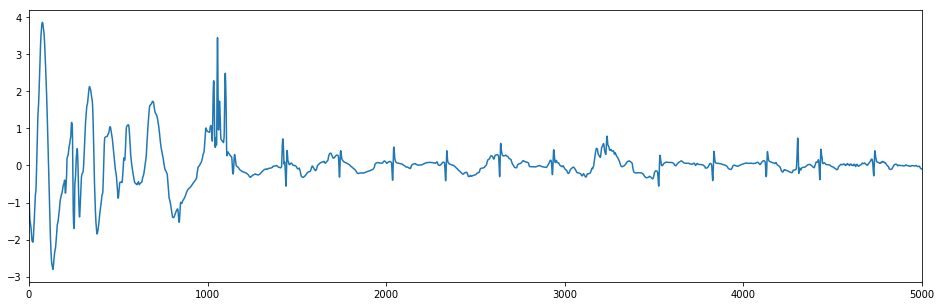

GT:2
Pred: 3


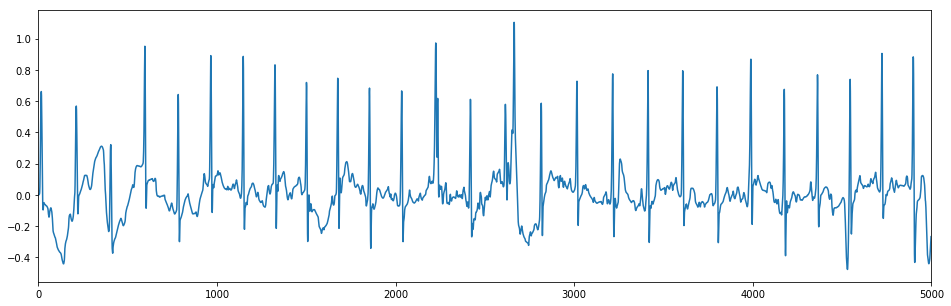

GT:2
Pred: 3


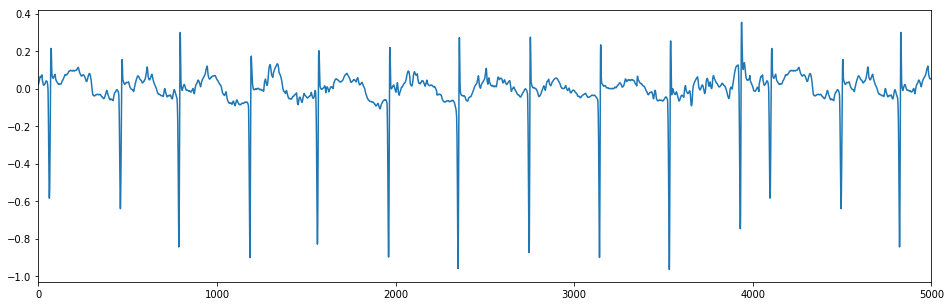

GT:2
Pred: 3


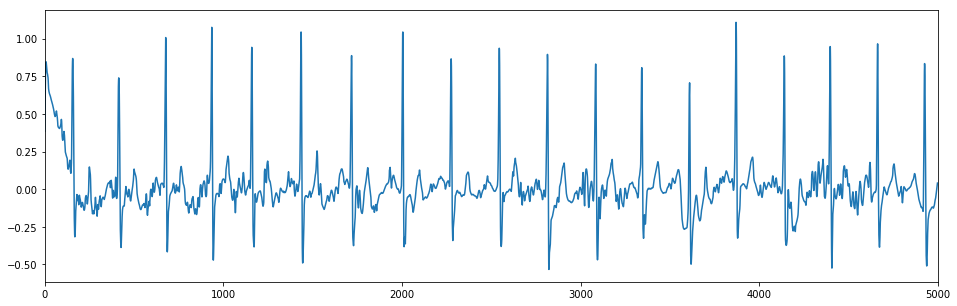

GT:2
Pred: 3


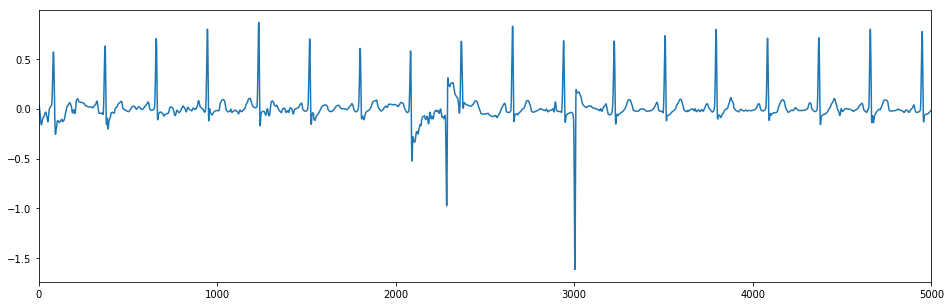

GT:2
Pred: 3


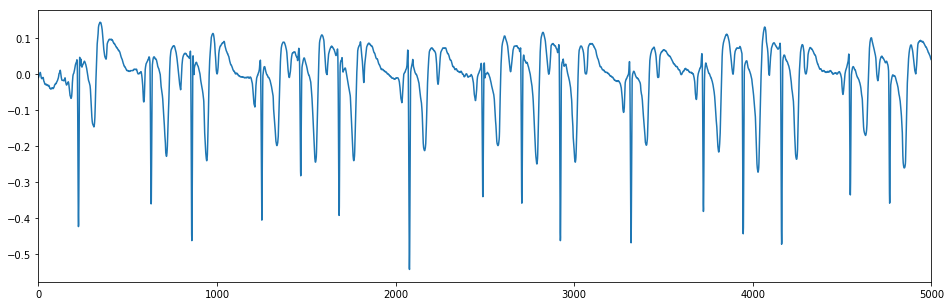

GT:2
Pred: 3


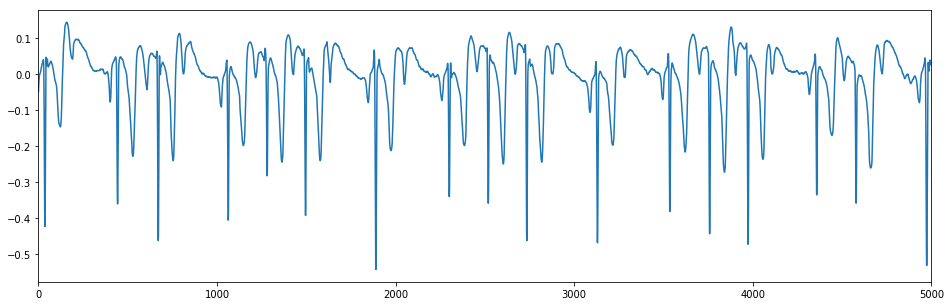

GT:2
Pred: 3


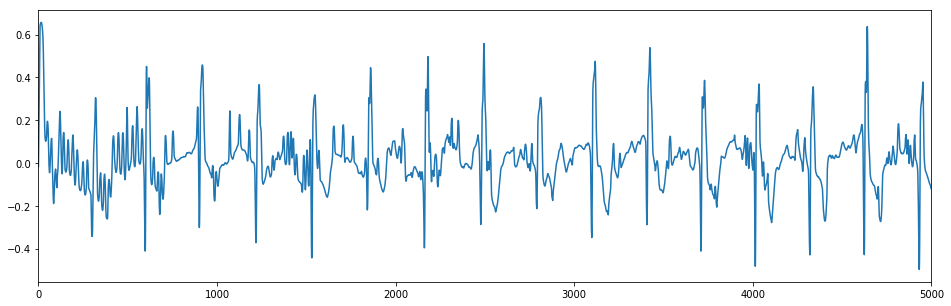

GT:2
Pred: 3


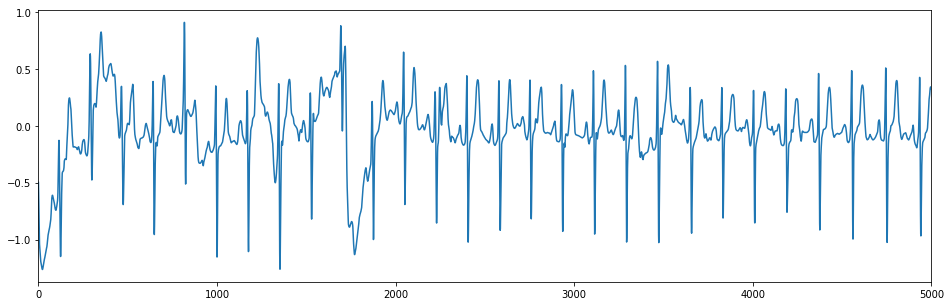

GT:2
Pred: 3


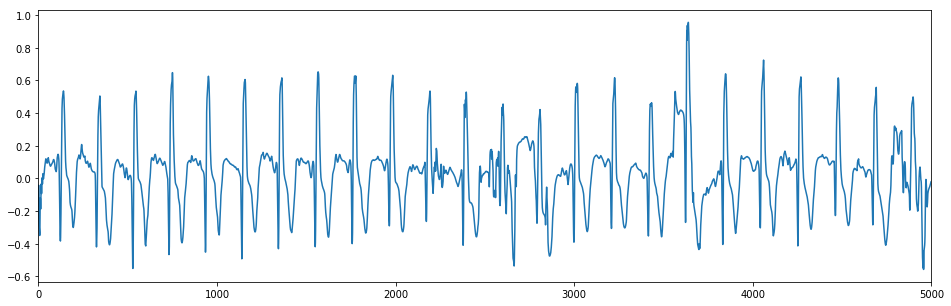

GT:2
Pred: 3


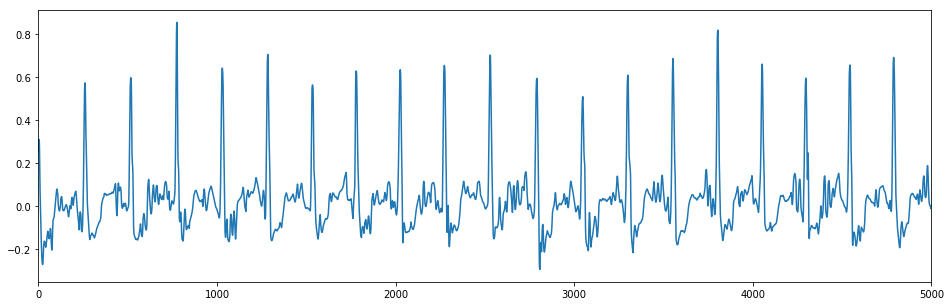

GT:2
Pred: 3


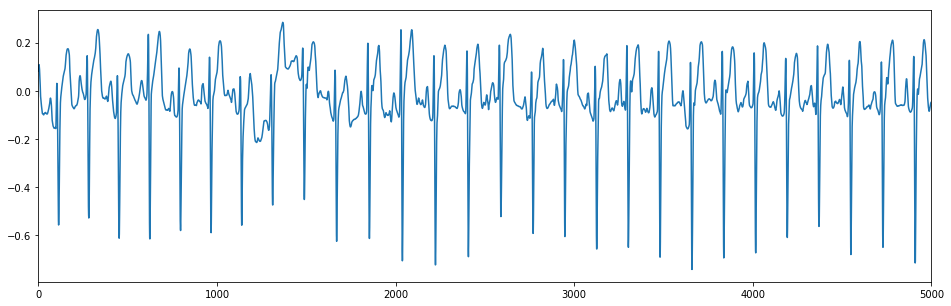

In [3]:
for i in N_O:
    show(f1_X_val[i][:5000], f1_val_cat[i], f1_validation_prediction[i])